In [1]:
from datetime import datetime, timedelta
import json
from math import ceil
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from models.qp.qpercent import QPercent
from util.batcher import Batcher
from util.stock_loader import Loader

In [2]:
!ls ../models/qp

__pycache__ data        qpercent.py


In [3]:
SD = 0.05 * (0.8 ** 4) # -4 ... 10 
print('SD:', SD)

SD: 0.020480000000000005


In [4]:
DATA = '../models/qp/data'
SYMBOLS = [
    'ABMD', 'ABNB', 'AMZN', 'ANET', 'ATVI', 'AXON', 'AYX', 'BILI', 'BYND', 
    'COUR','CPNG', 'DDOG', 'DOCU', 'DUOL', 'EDIT', 'ETSY', 'FSLY', 'FUV', 
    'GH', 'GMED', 'INTG', 'ISRG', 'JD', 'LULU', 'LUV', 'MDB', 'MELI', 
    'MNST', 'MTCH', 'NVCR', 'OKTA', 'PANW', 'PINS', 'PTON', 'QDEL', 
    'RDFN', 'RGEN', 'ROKU', 'SE', 'SHOP', 'TDOC', 'TEAM', 'TREX', 'TTD', 
    'TTWO', 'TWLO', 'TWTR', 'UPST', 'VEEV', 'ZEN', 'ZG', 'ZNGA']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

52

In [5]:
N_YEARS = 50
N_CUTS = 10
N_DAYS = int(round(365.25 * N_YEARS))
TODAY = datetime.now().date()
START = '1978-07-26' #str(TODAY - timedelta(N_DAYS))
START, TODAY

('1978-07-26', datetime.date(2021, 8, 6))

In [6]:
batcher = Batcher(SYMBOLS, INDICES)
batch = batcher.get_batch_from_weekday(TODAY.weekday())
batch

['TTWO', 'TWLO', 'TWTR', 'UPST', 'VEEV', 'ZEN', 'ZG', 'ZNGA', '^IXIC']

In [7]:
stock_loader = Loader(batch, START, verbose=True)
data = stock_loader.download()

[*********************100%***********************]  9 of 9 completed
Generating derived columns...
   ...TTWO
   ...TWLO
   ...TWTR
   ...UPST
   ...VEEV
   ...ZEN
   ...ZG
   ...ZNGA
   ...^IXIC


In [8]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock or x[0] == 'Date']]
    first_value = sub.Value[stock][sub.Value[stock].notna()].index[0]
    sub = sub.loc[first_value:, :]
    sub.index = range(sub.shape[0])
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    return sub

In [9]:
def str_to_tuple(s):
    s = s[1:-1]
    return tuple([float(x) for x in s.split(', ')])

str_to_tuple('(0.123, 0.456)')

(0.123, 0.456)

In [10]:
def read_best_params(stock):
    try:
        with open(f'{DATA}/{stock}_best.json', 'r') as f:
            params = json.load(f)
        for k in params:
            params[k]['q_params'] = {
                str_to_tuple(k): v 
                for k, v in params[k]['q_params'].items()}
        best_returns = {k: params[k]['best_return'] for k in params}
        print('Loaded current best.')
        return params, best_returns
    except FileNotFoundError:
        print('No saved data. Initialized as None')
        return None, None
    except:
        print(f'Unexpected error getting {stock} data. '
              'Initialized as None.')

In [11]:
def get_best_param_set(qp):
    best_param_set = qp.best_param_set
    for method in best_param_set:
        best_param_set[method]['best_return'] = qp.best_returns[method]
        # stringify tuple keys:
        best_param_set[method]['q_params'] = {
            str(k): v 
            for k, v in best_param_set[method]['q_params'].items()}
    return best_param_set

In [12]:
def save_best_param_set(best_param_set, stock):
    print(f'Saving {stock} params...')
    with open(f'{DATA}/{stock}_best.json', 'w') as f:
        json.dump(best_param_set, f)

In [13]:
if TODAY.weekday() == 0:
    !say update standard deviation




----------------------------------------------------------------------
                                 TTWO
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 13.999078625595509
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 5
Beginning adjusted search...
Round: 20


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 13.999078625595509
Refitting current best...
Current best ew_ma returns: 16.338414751875288
Fraction Invested: 0.9985271288200009
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 16.331216673052
Invested: 0.9985271288200009
New best: 16.31245765234128
Invested: 0.9985271288200009
New best: 16.312510987946226
Invested: 0.9985271288200009
New best: 16.312424521616283
Invested: 0.9985271288200009
New best: 16.25122146063876
Invested:

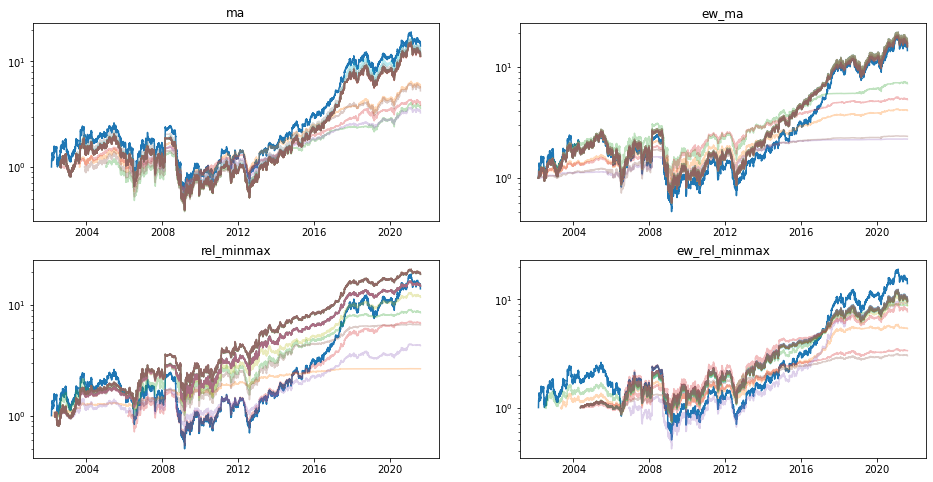

Saving TTWO params...



----------------------------------------------------------------------
                                 TWLO
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 12.95362345125391
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 5
Beginning adjusted search...
Round: 20


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 12.95362345125391
Refitting current best...
Current best ew_ma returns: 19.091295662327447
Fraction Invested: 0.9978203130411737
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 19.092852914728308
Invested: 0.9978203130411737
New best: 19.092807088470572
Invested: 0.9978203130411737
New best: 19.09119641766551
Invested: 0.9978203130411737
New best: 19.090819089355527
Invested: 0.9978203130411737
New best: 19.0

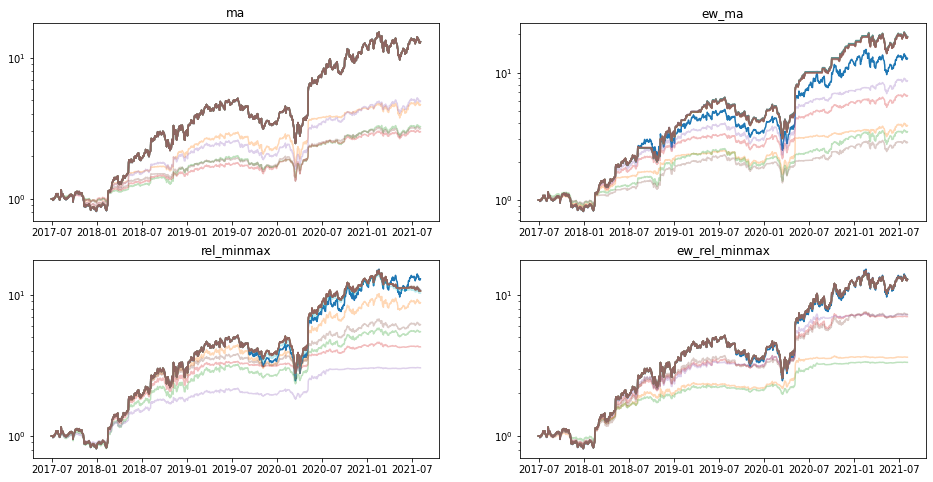

Saving TWLO params...



----------------------------------------------------------------------
                                 TWTR
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 1.8810750837617574
Refitting current best...
Current best ma returns: 2.7610260208717747
Fraction Invested: 0.7880315200930512
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 2.371680073687579
Invested: 0.7880315200930512
New best: 2.378552295767082
Invested: 0.7880315200930512
New best: 2.3105729804150847
Invested: 0.7880315200930512
New best: 2.3116111038743172
Invested: 0.7880315200930512
New best: 2.0284024165022663
Invested: 0.5788812232202435
New best: 2.0183899255247644
Invested: 0.5788812232202435
New best: 2.108210281122985
Invested: 0.5788812232202435
New best: 2.108210281122985
Invested: 0.5788812232202435
New best: 2.10758109102045

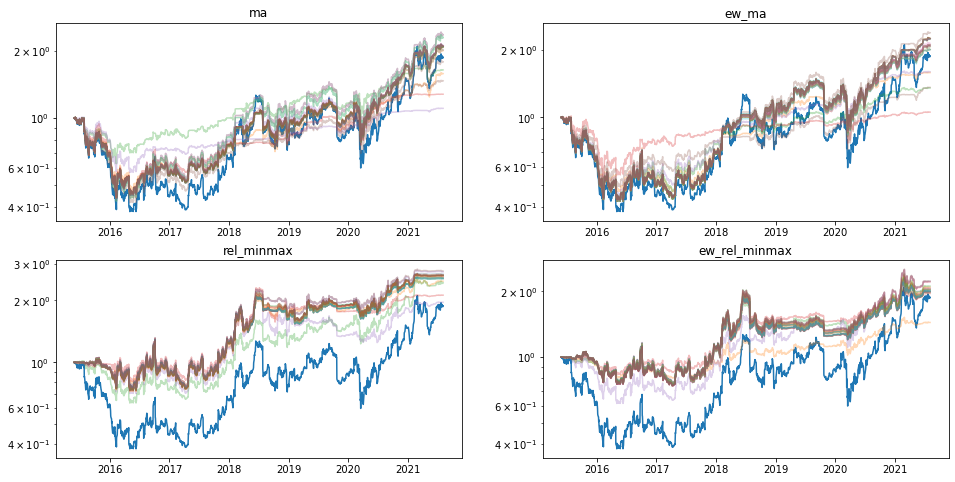

Saving TWTR params...



----------------------------------------------------------------------
                                 UPST
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 1.6698432372281544
Refitting current best...
Current best ma returns: 1.7515134170432989
Fraction Invested: 0.994014980014994
Beginning random search...
New best: 2.136074165306168
Invested: 0.88116339173293

Beginning adjusted search...
New best: 2.13790303240879
Invested: 0.7327558243639526
New best: 2.13790303240879
Invested: 0.7327558243639526
New best: 2.1393499990534375
Invested: 0.7327558243639526
New best: 2.1393499990534375
Invested: 0.7327558243639526
New best: 2.1400655792653698
Invested: 0.7327558243639526
New best: 2.1385021861560527
Invested: 0.7327558243639526
New best: 2.138310707806914
Invested: 0.7538931884712704
New best: 2.138262085672566
Invested: 0

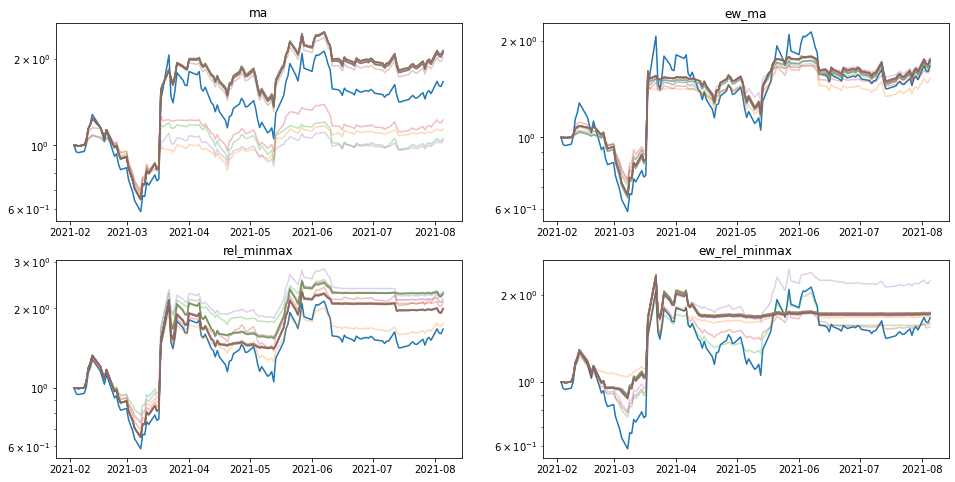

Saving UPST params...



----------------------------------------------------------------------
                                 VEEV
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 12.386487159276216
Refitting current best...
Current best ma returns: 13.310068644633713
Fraction Invested: 0.9996718774439958
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 12.86495529962632
Invested: 0.9996718774439958
New best: 12.86495529962632
Invested: 0.9996718774439958
New best: 12.847883751361705
Invested: 0.9996718774439958
New best: 12.850303869824877
Invested: 0.9996718774439958
New best: 12.850303869824877
Invested: 0.9996718774439958
New best: 12.861129285659056
Invested: 0.9996718774439958
New best: 12.884249891044886
Invested: 0.9996718774439958
New best: 12.836544406467882
Invested: 0.9996718774439958
New best: 12.83954336860

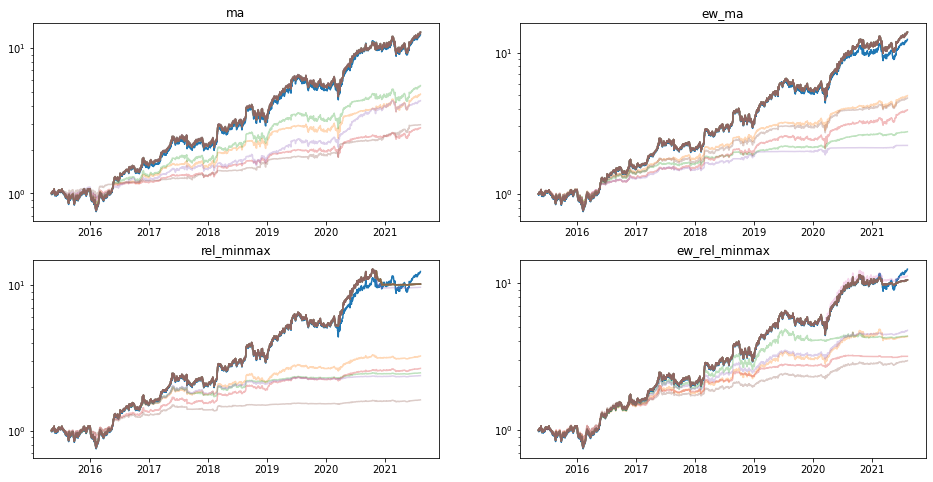

Saving VEEV params...



----------------------------------------------------------------------
                                 ZEN
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 6.50678743792726
Refitting current best...
Current best ma returns: 7.06279820011834
Fraction Invested: 0.9992853965019769
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 7.053695217080372
Invested: 0.9992853965019769
New best: 6.841593557035917
Invested: 0.9992853965019769
New best: 6.8254143244866325
Invested: 0.9992853965019769
New best: 6.825047461504536
Invested: 0.9992853965019769
New best: 6.825611424125833
Invested: 0.9992853965019769
New best: 6.825596044460093
Invested: 0.9992853965019769
New best: 6.825250356706439
Invested: 0.9992853965019769
New best: 6.823693440933176
Invested: 0.9992853965019769
New best: 6.812317886720971
Invest

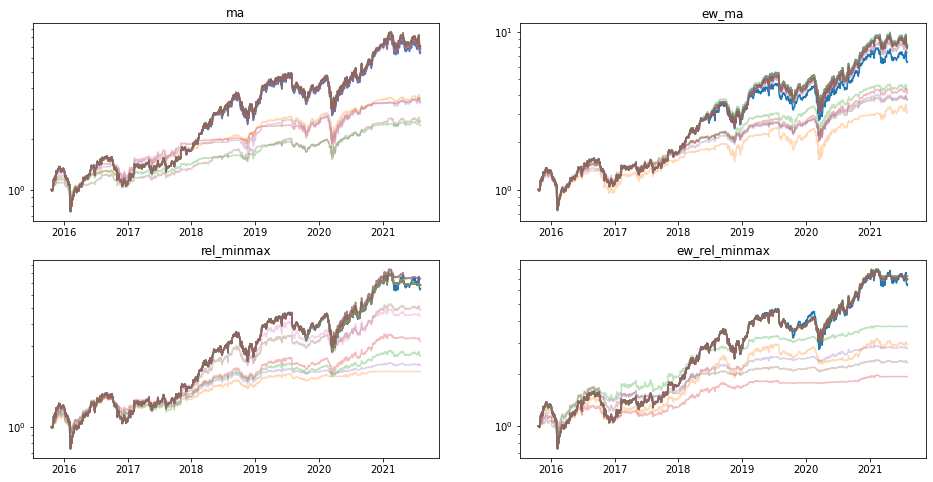

Saving ZEN params...



----------------------------------------------------------------------
                                 ZG
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 4.895268587263592
Refitting current best...
Current best ma returns: 5.315176807319525
Fraction Invested: 0.9977523120600981
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 5.309142633062515
Invested: 0.9977523120600981
New best: 5.30714977516221
Invested: 0.9977523120600981
New best: 5.312791714382605
Invested: 0.9977523120600981
New best: 5.246545427407191
Invested: 0.9977523120600981
New best: 5.247151328366909
Invested: 0.9977523120600981
New best: 5.248706409810532
Invested: 0.9974965594513726
New best: 5.244109464357934
Invested: 0.9974965594513726
New best: 5.244109464357934
Invested: 0.9974965594513726
New best: 5.243840141628836
Invested

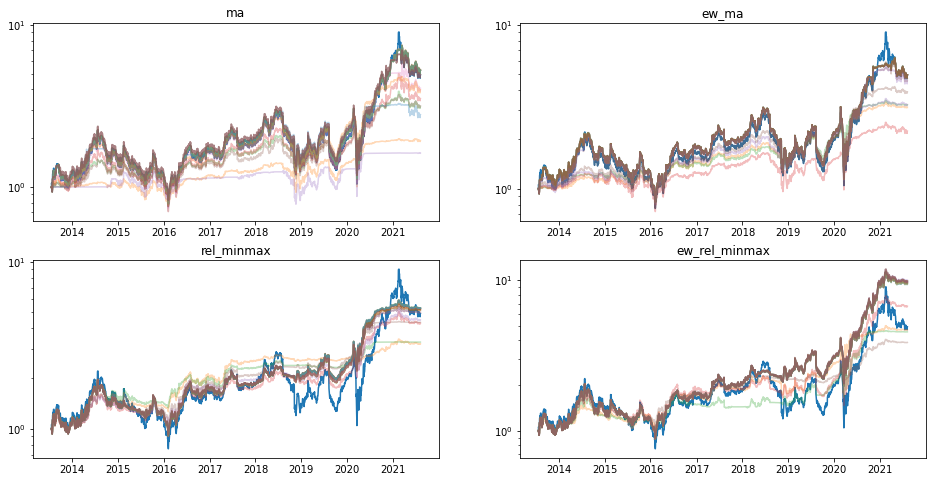

Saving ZG params...



----------------------------------------------------------------------
                                 ZNGA
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 2.288056323514024
Refitting current best...
Current best ma returns: 2.7175527706870586
Fraction Invested: 0.9997028411201404
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 2.71746625888497
Invested: 0.9997028411201404
New best: 2.7118213285773196
Invested: 0.9997028411201404
New best: 2.711684933947754
Invested: 0.9997028411201404
New best: 2.711724874958967
Invested: 0.9997028411201404
New best: 2.7297353389328434
Invested: 0.9997028411201404
New best: 2.641587743416377
Invested: 0.9997028411201404
New best: 2.6416186053662063
Invested: 0.9997028411201404
New best: 2.6594281621645486
Invested: 0.9997028411201404
New best: 2.659535581486626
In

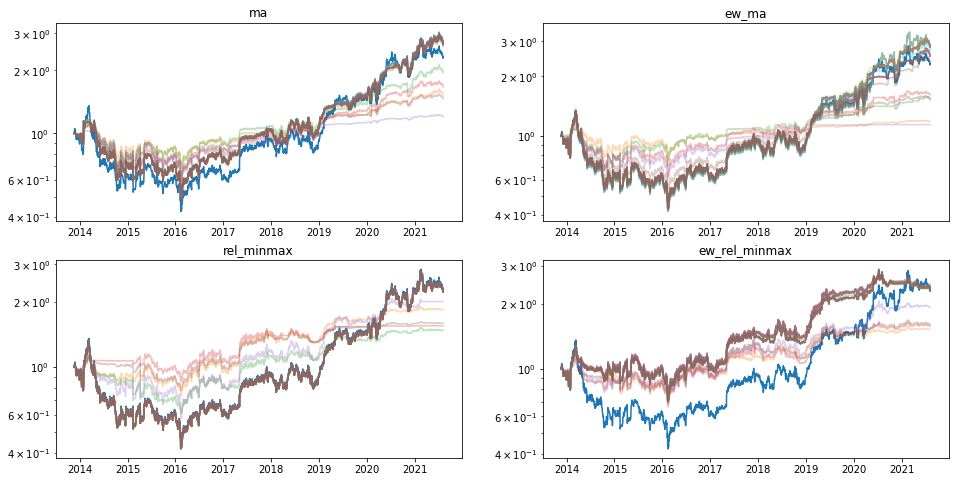

Saving ZNGA params...



----------------------------------------------------------------------
                                 ^IXIC
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 35.891855704066266
Refitting current best...
Current best ma returns: 41.66253151977429
Fraction Invested: 0.98088831910533
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 41.66253151977429
Invested: 0.98088831910533
New best: 41.66129333445184
Invested: 0.98088831910533
New best: 41.653814520861175
Invested: 0.98088831910533
New best: 41.65406120232067
Invested: 0.98088831910533
New best: 41.65637752692826
Invested: 0.98088831910533
New best: 41.65974455279182
Invested: 0.98088831910533
New best: 41.660278670789914
Invested: 0.98088831910533
New best: 41.658863291384364
Invested: 0.98088831910533
New best: 41.658863291384364
Invested: 0.9808

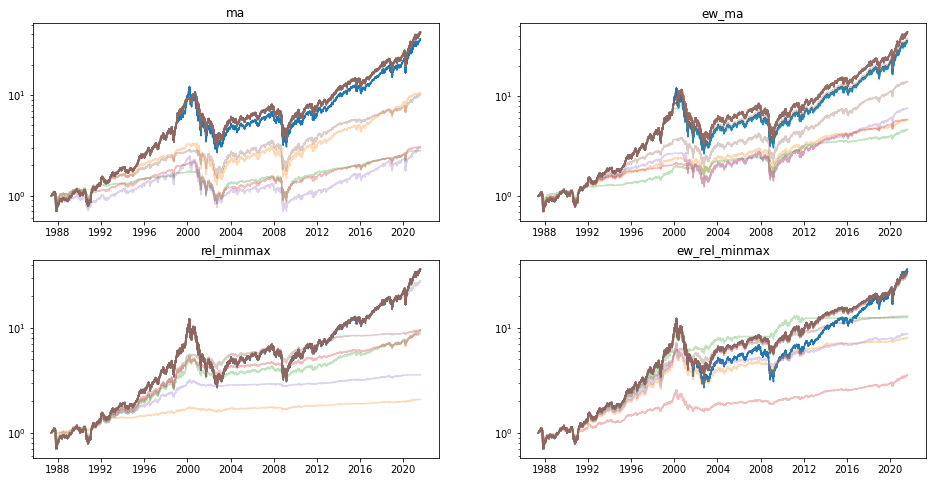

Saving ^IXIC params...


In [14]:
N_RAND = 5
N_ADJ = 20

for stock in batch:
    print('\n\n')
    print('-' * 70)
    print(' ' * 32, stock)
    print('-' * 70)
    best_params, best_returns = read_best_params(stock)
    stock_data = get_stock_data(stock, data)
    if stock == 'INTG':
        stock_data.fillna(method='ffill', inplace=True)
        stock_data.fillna(method='bfill', inplace=True)
    qp = QPercent(stock_data, 
                  N_CUTS, 
                  best_param_set=best_params, 
                  best_returns=best_returns, 
                  sd=SD)
    qp.run_sims(N_RAND, N_ADJ)
    best = get_best_param_set(qp)
    save_best_param_set(best, stock)

In [15]:
def get_summary(stocks):
    for stock in stocks:
        try:
            with open(f'{DATA}/{stock}_best.json', 'r') as f:
                best = json.load(f)
            best_method = None
            best_return = 0
            best_pct = None
            for key in best:
                ret = best[key]['best_return']
                if ret > best_return:
                    best_return = ret
                    best_method = key
                    best_pct = best[key]['pct']
            print(f'\n{stock}:\n  Best Return: {best_return} '
                  f'({best_method})\n  {100 * best_pct:.2f}% in')
        except FileNotFoundError:
            print('No data for', stock)
            continue
        except:
            print('Bad Data for', stock)
            continue

In [16]:
ALL = SYMBOLS + INDICES
#get_summary(ALL)
get_summary(batch)


TTWO:
  Best Return: 19.064413429800506 (rel_minmax)
  34.23% in

TWLO:
  Best Return: 18.99269055716609 (ew_ma)
  99.78% in

TWTR:
  Best Return: 2.776873498972609 (rel_minmax)
  15.69% in

UPST:
  Best Return: 2.024301140675081 (ma)
  78.39% in

VEEV:
  Best Return: 13.93359043664441 (ew_ma)
  99.90% in

ZEN:
  Best Return: 7.979566290825953 (ew_ma)
  99.65% in

ZG:
  Best Return: 9.859561522611138 (ew_rel_minmax)
  22.68% in

ZNGA:
  Best Return: 2.594207149284107 (ma)
  99.98% in

^IXIC:
  Best Return: 42.284005992759916 (ma)
  99.44% in


In [17]:
!say qp is dunzo

IXIC: Nasdaq